## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  52.613335   511.884485  0.954894  4.760146  1.422107
1   3.223466  1087.656351  0.711098  1.432762  1.742769
2  43.969547  1218.295368  0.949403  9.088493  1.516062
3  70.531344  1666.931592  0.939414  2.492032  1.536784
4  59.007992   609.890317  0.539990  3.206265  1.299655


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.21088 | train_mse: 3.68151 | train_mae: 1.46422 |  0:00:00s
epoch 1  | loss: 0.71669 | train_mse: 4.27053 | train_mae: 1.4332  |  0:00:00s


epoch 2  | loss: 0.79578 | train_mse: 3.88185 | train_mae: 1.42715 |  0:00:00s
epoch 3  | loss: 0.40801 | train_mse: 3.85537 | train_mae: 1.34669 |  0:00:00s
epoch 4  | loss: 0.38505 | train_mse: 3.02671 | train_mae: 1.15723 |  0:00:00s


epoch 5  | loss: 0.42333 | train_mse: 1.27294 | train_mae: 0.79137 |  0:00:00s
epoch 6  | loss: 0.25823 | train_mse: 0.86597 | train_mae: 0.66807 |  0:00:00s
epoch 7  | loss: 0.27967 | train_mse: 0.6234  | train_mae: 0.58179 |  0:00:01s


epoch 8  | loss: 0.48935 | train_mse: 0.61337 | train_mae: 0.58853 |  0:00:01s
epoch 9  | loss: 0.30376 | train_mse: 0.77574 | train_mae: 0.63536 |  0:00:01s
epoch 10 | loss: 0.26075 | train_mse: 0.72949 | train_mae: 0.59032 |  0:00:01s


epoch 11 | loss: 0.28596 | train_mse: 0.43281 | train_mae: 0.44938 |  0:00:01s
epoch 12 | loss: 0.24632 | train_mse: 0.32295 | train_mae: 0.40223 |  0:00:01s


epoch 13 | loss: 0.17623 | train_mse: 0.32081 | train_mae: 0.40461 |  0:00:01s
epoch 14 | loss: 0.23514 | train_mse: 0.38373 | train_mae: 0.43486 |  0:00:01s
epoch 15 | loss: 0.38171 | train_mse: 0.50248 | train_mae: 0.48375 |  0:00:01s


epoch 16 | loss: 0.13253 | train_mse: 0.29405 | train_mae: 0.39705 |  0:00:01s
epoch 17 | loss: 0.29538 | train_mse: 0.17708 | train_mae: 0.31598 |  0:00:01s
epoch 18 | loss: 0.1987  | train_mse: 0.14036 | train_mae: 0.28953 |  0:00:02s


epoch 19 | loss: 0.46018 | train_mse: 0.13984 | train_mae: 0.28852 |  0:00:02s
epoch 20 | loss: 0.14465 | train_mse: 0.14888 | train_mae: 0.29755 |  0:00:02s
epoch 21 | loss: 0.11767 | train_mse: 0.12292 | train_mae: 0.27086 |  0:00:02s
epoch 22 | loss: 0.301   | train_mse: 0.11431 | train_mae: 0.26842 |  0:00:02s


epoch 23 | loss: 0.22941 | train_mse: 0.14729 | train_mae: 0.27707 |  0:00:02s
epoch 24 | loss: 0.19586 | train_mse: 0.11282 | train_mae: 0.25837 |  0:00:02s


epoch 25 | loss: 0.24667 | train_mse: 0.13175 | train_mae: 0.26915 |  0:00:02s
epoch 26 | loss: 0.26406 | train_mse: 0.13072 | train_mae: 0.26862 |  0:00:02s


epoch 27 | loss: 0.24267 | train_mse: 0.15645 | train_mae: 0.28743 |  0:00:02s
epoch 28 | loss: 0.10188 | train_mse: 0.18213 | train_mae: 0.3107  |  0:00:02s


epoch 29 | loss: 0.23832 | train_mse: 0.13606 | train_mae: 0.26831 |  0:00:03s
epoch 30 | loss: 0.09245 | train_mse: 0.10053 | train_mae: 0.23356 |  0:00:03s
epoch 31 | loss: 0.13124 | train_mse: 0.09612 | train_mae: 0.24459 |  0:00:03s


epoch 32 | loss: 0.11766 | train_mse: 0.11    | train_mae: 0.24969 |  0:00:03s
epoch 33 | loss: 0.07762 | train_mse: 0.07831 | train_mae: 0.2216  |  0:00:03s


epoch 34 | loss: 0.11349 | train_mse: 0.08668 | train_mae: 0.22531 |  0:00:03s
epoch 35 | loss: 0.1476  | train_mse: 0.08641 | train_mae: 0.22754 |  0:00:03s
epoch 36 | loss: 0.30865 | train_mse: 0.08598 | train_mae: 0.22895 |  0:00:03s


epoch 37 | loss: 0.15134 | train_mse: 0.15003 | train_mae: 0.28476 |  0:00:03s
epoch 38 | loss: 0.12429 | train_mse: 0.14786 | train_mae: 0.27759 |  0:00:04s
epoch 39 | loss: 0.12762 | train_mse: 0.12662 | train_mae: 0.26271 |  0:00:04s


epoch 40 | loss: 0.15773 | train_mse: 0.12144 | train_mae: 0.26479 |  0:00:04s


epoch 41 | loss: 0.14513 | train_mse: 0.12806 | train_mae: 0.27194 |  0:00:04s
epoch 42 | loss: 0.25724 | train_mse: 0.12617 | train_mae: 0.27278 |  0:00:04s
epoch 43 | loss: 0.11486 | train_mse: 0.12045 | train_mae: 0.26992 |  0:00:04s
epoch 44 | loss: 0.24819 | train_mse: 0.10762 | train_mae: 0.25767 |  0:00:04s


epoch 45 | loss: 0.14994 | train_mse: 0.08587 | train_mae: 0.22676 |  0:00:04s
epoch 46 | loss: 0.09881 | train_mse: 0.09683 | train_mae: 0.23815 |  0:00:04s
epoch 47 | loss: 0.09947 | train_mse: 0.13431 | train_mae: 0.27211 |  0:00:04s


epoch 48 | loss: 0.12755 | train_mse: 0.12777 | train_mae: 0.27469 |  0:00:04s
epoch 49 | loss: 0.14417 | train_mse: 0.10794 | train_mae: 0.26369 |  0:00:04s
epoch 50 | loss: 0.31513 | train_mse: 0.14402 | train_mae: 0.2864  |  0:00:04s


epoch 51 | loss: 0.4703  | train_mse: 0.18395 | train_mae: 0.32051 |  0:00:05s
epoch 52 | loss: 0.32033 | train_mse: 0.12616 | train_mae: 0.27562 |  0:00:05s
epoch 53 | loss: 0.13396 | train_mse: 0.10236 | train_mae: 0.25294 |  0:00:05s
epoch 54 | loss: 0.1804  | train_mse: 0.08946 | train_mae: 0.22691 |  0:00:05s
epoch 55 | loss: 0.13424 | train_mse: 0.08838 | train_mae: 0.22042 |  0:00:05s


epoch 56 | loss: 0.13224 | train_mse: 0.07298 | train_mae: 0.21557 |  0:00:05s
epoch 57 | loss: 0.16978 | train_mse: 0.10053 | train_mae: 0.23728 |  0:00:05s
epoch 58 | loss: 0.21329 | train_mse: 0.11101 | train_mae: 0.24978 |  0:00:05s
epoch 59 | loss: 0.15635 | train_mse: 0.0869  | train_mae: 0.22826 |  0:00:05s


epoch 60 | loss: 0.0773  | train_mse: 0.08367 | train_mae: 0.22613 |  0:00:05s
epoch 61 | loss: 0.18251 | train_mse: 0.07046 | train_mae: 0.21043 |  0:00:05s
epoch 62 | loss: 0.11359 | train_mse: 0.05829 | train_mae: 0.19455 |  0:00:05s


epoch 63 | loss: 0.19709 | train_mse: 0.07112 | train_mae: 0.21473 |  0:00:05s
epoch 64 | loss: 0.15852 | train_mse: 0.10313 | train_mae: 0.24966 |  0:00:05s
epoch 65 | loss: 0.297   | train_mse: 0.07559 | train_mae: 0.22514 |  0:00:06s


epoch 66 | loss: 0.21256 | train_mse: 0.05827 | train_mae: 0.20077 |  0:00:06s
epoch 67 | loss: 0.3819  | train_mse: 0.07491 | train_mae: 0.20959 |  0:00:06s
epoch 68 | loss: 0.23777 | train_mse: 0.11182 | train_mae: 0.23682 |  0:00:06s


epoch 69 | loss: 0.25554 | train_mse: 0.14764 | train_mae: 0.2642  |  0:00:06s


epoch 70 | loss: 0.25716 | train_mse: 0.14943 | train_mae: 0.26688 |  0:00:06s
epoch 71 | loss: 0.22867 | train_mse: 0.15146 | train_mae: 0.26966 |  0:00:06s


epoch 72 | loss: 0.15023 | train_mse: 0.14301 | train_mae: 0.27222 |  0:00:07s
epoch 73 | loss: 0.20035 | train_mse: 0.10292 | train_mae: 0.21915 |  0:00:07s
epoch 74 | loss: 0.16567 | train_mse: 0.10776 | train_mae: 0.22396 |  0:00:07s
epoch 75 | loss: 0.15193 | train_mse: 0.10793 | train_mae: 0.24012 |  0:00:07s


epoch 76 | loss: 0.32537 | train_mse: 0.14628 | train_mae: 0.28416 |  0:00:07s
epoch 77 | loss: 0.14674 | train_mse: 0.12258 | train_mae: 0.25761 |  0:00:07s
epoch 78 | loss: 0.17655 | train_mse: 0.13755 | train_mae: 0.2469  |  0:00:07s
epoch 79 | loss: 0.23505 | train_mse: 0.12939 | train_mae: 0.23754 |  0:00:07s


epoch 80 | loss: 0.24343 | train_mse: 0.10771 | train_mae: 0.25264 |  0:00:07s
epoch 81 | loss: 0.14716 | train_mse: 0.09542 | train_mae: 0.24842 |  0:00:07s
epoch 82 | loss: 0.20741 | train_mse: 0.10362 | train_mae: 0.25325 |  0:00:07s
epoch 83 | loss: 0.11432 | train_mse: 0.08852 | train_mae: 0.23075 |  0:00:07s


epoch 84 | loss: 0.20767 | train_mse: 0.07825 | train_mae: 0.22677 |  0:00:07s
epoch 85 | loss: 0.10978 | train_mse: 0.07107 | train_mae: 0.20746 |  0:00:07s
epoch 86 | loss: 0.12837 | train_mse: 0.10351 | train_mae: 0.24929 |  0:00:07s


epoch 87 | loss: 0.20986 | train_mse: 0.12499 | train_mae: 0.26619 |  0:00:08s
epoch 88 | loss: 0.15948 | train_mse: 0.1029  | train_mae: 0.22244 |  0:00:08s
epoch 89 | loss: 0.15755 | train_mse: 0.09619 | train_mae: 0.22055 |  0:00:08s
epoch 90 | loss: 0.24159 | train_mse: 0.09777 | train_mae: 0.22963 |  0:00:08s


epoch 91 | loss: 0.11295 | train_mse: 0.06495 | train_mae: 0.20313 |  0:00:08s
epoch 92 | loss: 0.15256 | train_mse: 0.07008 | train_mae: 0.20978 |  0:00:08s
epoch 93 | loss: 0.12005 | train_mse: 0.08441 | train_mae: 0.22919 |  0:00:08s
epoch 94 | loss: 0.09308 | train_mse: 0.07595 | train_mae: 0.21608 |  0:00:08s


epoch 95 | loss: 0.09707 | train_mse: 0.0849  | train_mae: 0.22351 |  0:00:08s
epoch 96 | loss: 0.10821 | train_mse: 0.10092 | train_mae: 0.23865 |  0:00:08s
epoch 97 | loss: 0.13838 | train_mse: 0.08201 | train_mae: 0.23069 |  0:00:08s


epoch 98 | loss: 0.24957 | train_mse: 0.06719 | train_mae: 0.216   |  0:00:08s
epoch 99 | loss: 0.13623 | train_mse: 0.07983 | train_mae: 0.21786 |  0:00:08s
epoch 100| loss: 0.13312 | train_mse: 0.07668 | train_mae: 0.2186  |  0:00:08s


epoch 101| loss: 0.13842 | train_mse: 0.06556 | train_mae: 0.21301 |  0:00:09s
epoch 102| loss: 0.11543 | train_mse: 0.08011 | train_mae: 0.23003 |  0:00:09s
epoch 103| loss: 0.12947 | train_mse: 0.11746 | train_mae: 0.26811 |  0:00:09s


epoch 104| loss: 0.14997 | train_mse: 0.0946  | train_mae: 0.2461  |  0:00:09s
epoch 105| loss: 0.10191 | train_mse: 0.1161  | train_mae: 0.25331 |  0:00:09s
epoch 106| loss: 0.18243 | train_mse: 0.13409 | train_mae: 0.26467 |  0:00:09s


epoch 107| loss: 0.18313 | train_mse: 0.11719 | train_mae: 0.25494 |  0:00:09s
epoch 108| loss: 0.17368 | train_mse: 0.08483 | train_mae: 0.23466 |  0:00:09s
epoch 109| loss: 0.13609 | train_mse: 0.09148 | train_mae: 0.24087 |  0:00:09s


epoch 110| loss: 0.11669 | train_mse: 0.09789 | train_mae: 0.24743 |  0:00:09s
epoch 111| loss: 0.15826 | train_mse: 0.06984 | train_mae: 0.20576 |  0:00:10s
epoch 112| loss: 0.12585 | train_mse: 0.06581 | train_mae: 0.20832 |  0:00:10s

Early stopping occurred at epoch 112 with best_epoch = 62 and best_train_mae = 0.19455
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

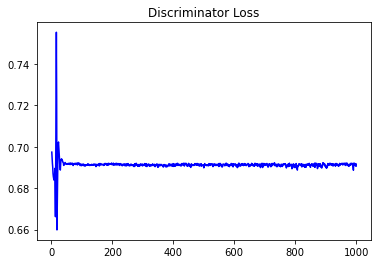

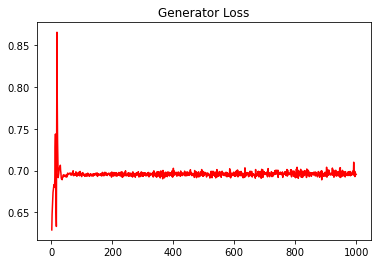

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3887321836889764


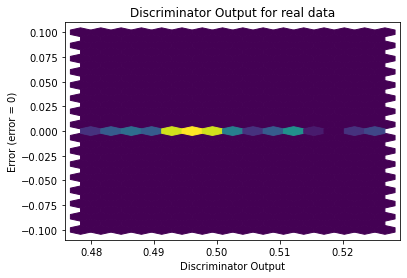

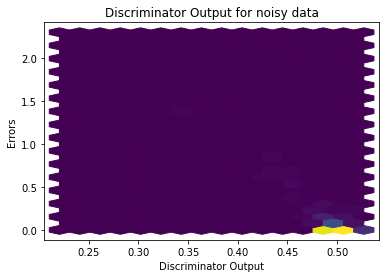

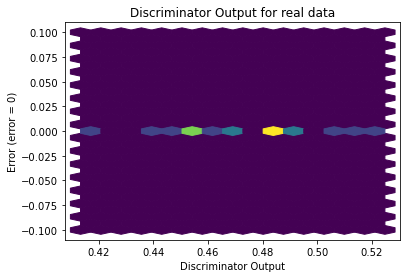

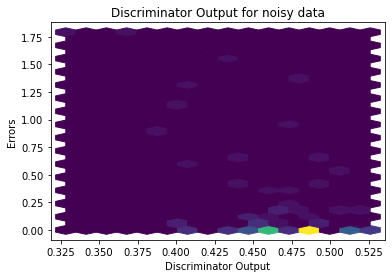

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


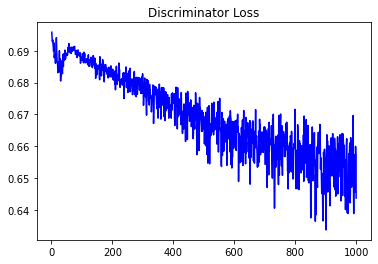

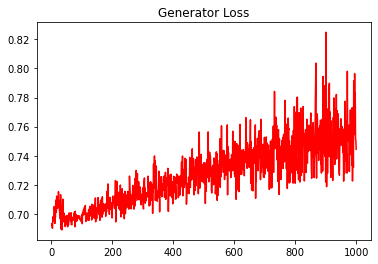

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.5303231960991739


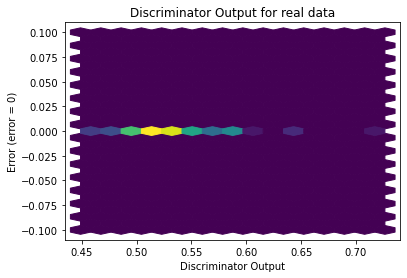

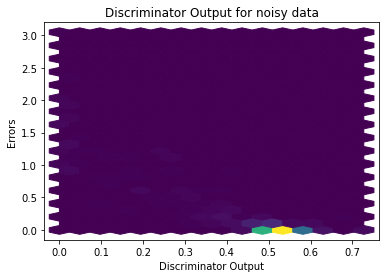

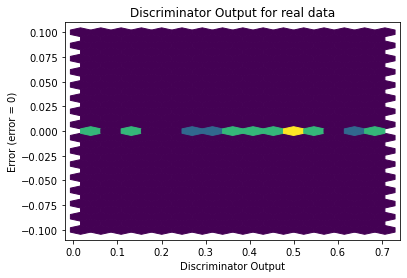

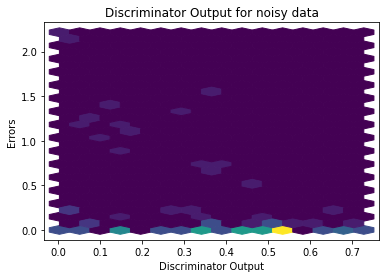

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1998]], requires_grad=True)
